<a href="https://colab.research.google.com/gist/almagashi/601d017cb390798ed3b06e04aca57b4b/monte-carlo-simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Simulations

---



In [ ]:
# IMPORT USEFUL LIBRARIES
import numpy as np
from scipy import random
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline

# Buffon's Needle

Initially, we create a number of needles to drop, and a number of trials to do the same thing. 
We create a function which will simulate the Buffon's needle by using the formulas given before. 
We have two outputs: A histogram with the pi-value estimation, and the error plot (this one has encountered some errors as it was divided by 0, and I was not able to fix it, thus it is not a very appropriate representation). 
The log-log plot shows the trend of the error decreasing with the number of trials. That makes sense, since, the more times we try to estimate it and we average that out, that will give us something closer to the actual value of pi inverse, rather than one trial.

This is the value of pi according to the estimation: 3.138889586419892


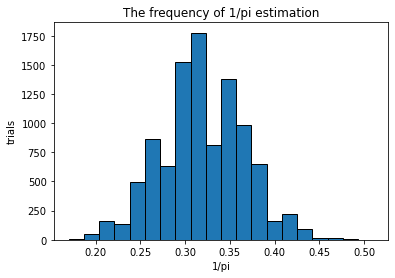

In [ ]:
drops = 100 # number of needles dropped
numTrials = 10000

def BuffonNeedle(drops, numTrials, error = False):
  '''
  Simulate Buffon's Needle from formulas

  Input:

    - drops (int): The number of needles dropped 
    - numTrials (int): The number of experimental trials
    - error (boolean): by default, there is no error; False

  Output:

    - log-log plot: An error plot showing error as a function of numTrials
    - histogram (plot): The estimation of pi over trials
    - piEst (int): The final estimation of pi
  '''

  y=[]
  for i in range(numTrials): 
    x=[]
    for i in range(drops):
      x.append(random.random()) # random position for needle
    hits = [] # touches the line
    miss =[] # does not touch the line
    theta =  [0.5*np.pi*random.random() for i in range(drops)] # fall angle
    n = [0.5*np.sin(th) for th in theta]

    for idx in range(len(x)):

        if x[idx]<=n[idx]:
          hits.append(1)

        else:
          hits.append(0)
    y.append(np.sum(hits)/drops)

  if error:
    xo = []
    yo = []

    for i in range(drops):
      slce = y[:i]
      error = (np.mean(slce))-(1/np.pi) # store error
      xo.append(np.log(abs(error))) # log error
      yo.append(np.log(i)) # log trials
    
    plt.plot(yo, xo) # logarithmic plot
    plt.xlabel('Logged error')
    plt.ylabel('Logged number of trials')
    
  else:
    plt.hist(y, bins=20, ec='black') # plot the estimation values
    plt.title ('The frequency of 1/pi estimation')
    plt.xlabel ('1/pi')
    plt.ylabel ('trials')

    piEst = 1/(sum(y)/numTrials) # pi estimation
    print(f'This is the value of pi according to the estimation:',piEst)

BuffonNeedle(drops, numTrials) 


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log


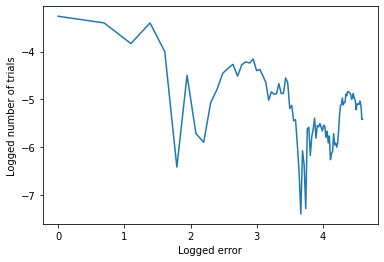

In [ ]:
BuffonNeedle(drops, numTrials, error=True) # logarithmic plot

# Buffon's Needle 2

In the three superexperiments we get very different histograms, as the range changes. While in the first experiment the range remains bigger, there is more chances that if we pick a random value of pi, we will get something not so close to pi. The confidence intervals are simply wider (from 3.05 to 3.25), thus having less degree of certainty. In the second histogram, the range narrows quite a lot (3.11, 3.17), so the chances for choosing a far-off estimated pi is also lower. Finally, we have the third histogram whose 95% confidence interval values are very close to the real value of pi, with a super narrow range of 3.135 - 3.150. This means that we are very likely to pick the closest value of pi if we chose a random sample from this distribution. 

In [ ]:
### Modify the returned function as needed for second problem prompt ###

drops = 100 # number of needles dropped
numTrials = 1000

def BuffonNeedle2(drops, numTrials, error = False):
  '''
  Simulate Buffon's Needle from formulas

  Input:

    - drops (int): The number of needles dropped 
    - numTrials (int): The number of experimental trials
    - error (boolean): by default, there is no error

  Output:.

    - piEst (int): The final estimation of pi
  '''

  y=[]
  for i in range(numTrials): 
    x=[]
    for i in range(drops):
      x.append(random.random()) # random position for needle
    hits = [] # touches the line
    miss =[] # does not touch the line
    theta =  [0.5*np.pi*random.random() for i in range(drops)] # fall angle
    n = [0.5*np.sin(th) for th in theta]

    for idx in range(len(x)):

        if x[idx]<=n[idx]:
          hits.append(1)

        else:
          hits.append(0)
    y.append(np.sum(hits)/drops)

    piEst = 1/(sum(y)/numTrials) # pi estimation
  return piEst

((array([   9.,   70.,  417., 1318., 2464., 2764., 1966.,  763.,  192.,
           37.]),
  array([3.01659125, 3.04029409, 3.06399693, 3.08769977, 3.11140261,
         3.13510545, 3.15880829, 3.18251113, 3.20621397, 3.22991681,
         3.25361965]),
  <a list of 10 Patch objects>),
 Text(0.5, 1.0, 'The estimated pi over trials'))

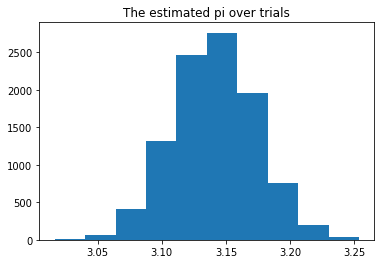

In [ ]:
def experiment1 (trials=10000):
  '''
  This experiment approximates the value of pi.

  Input:
   - Trials (int):10000
  
  Output:
  - Histogram (plot): The frequency of pi estimation over trials
  '''
  exp1 = []
  for i in range(trials):
    the_pi_1 = BuffonNeedle2(drops, numTrials=200) # store our estimated pi
    exp1.append(the_pi_1)
  return (plt.hist(exp1)), plt.title('The estimated pi over trials')
 
experiment1()

((array([  2.,  31.,  82., 166., 264., 238., 139.,  58.,  16.,   4.]),
  array([3.10834123, 3.11520949, 3.12207774, 3.12894599, 3.13581425,
         3.1426825 , 3.14955075, 3.15641901, 3.16328726, 3.17015551,
         3.17702376]),
  <a list of 10 Patch objects>),
 Text(0.5, 1.0, 'The estimated pi over trials'))

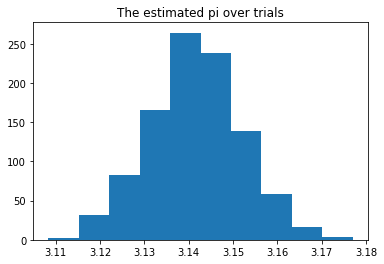

In [ ]:
def experiment2 (trials=1000):
  '''
  This experiment approximates the value of pi.

  Input:
   - Trials (int):1000
  
  Output:
  - Histogram (plot): The frequency of pi estimation over trials
  '''
  exp2 = []
  for i in range(trials):
    the_pi_2 = BuffonNeedle2(drops, numTrials=2000) # store our estimated pi
    exp2.append(the_pi_2)
  return (plt.hist(exp2)), plt.title('The estimated pi over trials')
 
experiment2()

((array([ 6.,  8., 14., 26., 22., 12.,  7.,  3.,  1.,  1.]),
  array([3.13440321, 3.13610516, 3.13780711, 3.13950906, 3.14121101,
         3.14291296, 3.14461491, 3.14631686, 3.14801881, 3.14972076,
         3.15142271]),
  <a list of 10 Patch objects>),
 Text(0.5, 1.0, 'The estimated pi over trials'))

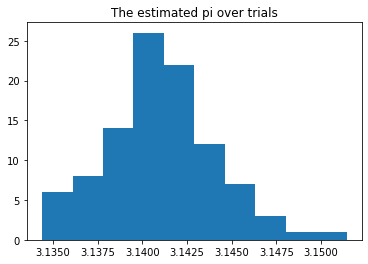

In [ ]:
def experiment3 (trials=100):
  '''
  This experiment approximates the value of pi.

  Input:
   - Trials (int):100
  
  Output:
  - Histogram (plot): The frequency of pi estimation over trials
  '''
  exp3 = []
  for i in range(trials):
    the_pi_3 = BuffonNeedle2(drops, numTrials=20000) # store our estimated pi
    exp3.append(the_pi_3)
  return (plt.hist(exp3)), plt.title('The estimated pi over trials')
 
experiment3()

# Order Statistics

In this problem, we generate random numbers from 0,1, we sort them and we choose the last number. We repeat this process about 1000 times and we plot the last numbers after each repetition. We also add an overlay of beta distribution and we confirm that the results match for different values of k.

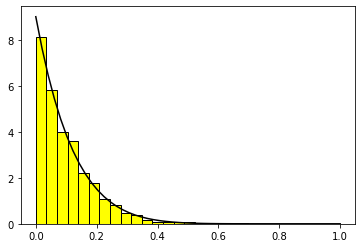

In [ ]:
def OrderStatistics(k = 1, numTrials = 1000):
    '''
    
    The distribution of a value from a random sample at a particular rank
    (e.g. smallest value in the sample)

    Input:

      - k (int): 1
      - numTrials (int): 1000

    Output:

      - histogram (plot): a plot with the smallest kth value and a beta dist.

    '''

    kth = [] # kth value
    
    for trial in range(numTrials): 
        all_numbers = []
        
        for i in range(9): 
            num = np.random.uniform(0,1)
            all_numbers.append(num)
            
        sorted_all =  sorted(all_numbers)
        kth.append(sorted_all[k-1])
   
    plt.hist(kth, bins = 20, color='yellow', ec='black', density = True)
      
    x_axis = np.linspace(0,1)   # beta(k, n+1-k) 
    
    plt.plot(x_axis, sts.beta.pdf(x_axis, a = k,b=9+1-k), c='black')
    plt.show()

OrderStatistics()

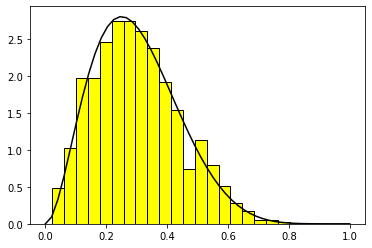

In [ ]:
OrderStatistics(k=3)

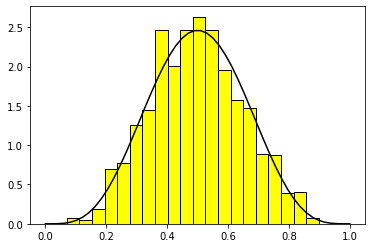

In [ ]:
OrderStatistics(k=5)

# Markov Chains

The missing values in the matrix are found by making sure the rows/columns add up to 1. Since we have no more than one missing value per row/column, it is 
easier to subtract 1 from the sum of the known values. This is how we obtain all the missing probabilities.
Since now our transition matrix is complete, we create a random initial distribution, as it is a required to find the stationary distribution.
From multiplying *initdist* and *P* for 10000 times, we get the invariant distribution. We see that our histogram shows a uniform distribution.
We check if we get the same invariant distribution with the eigenvalues, after.




In [ ]:
c_0 = 1-(0.5*np.exp(-3)) # find c_0
c_2 = 1-(0.5*np.exp(-1)+0.5) # find c_2
c_3= 1-(0.5*np.exp(-1)) # find c_3
P = np.array ([[c_0, 0.5*np.exp(-3), 0, 0], # represent the problem in Python
               [0.5, 0, 0.5, 0],
               [0,0.5*np.exp(-1), c_2,  0.5],
               [0,0, 0.5*np.exp(-1), c_3]])
print(P)

[[0.97510647 0.02489353 0.         0.        ]
 [0.5        0.         0.5        0.        ]
 [0.         0.18393972 0.31606028 0.5       ]
 [0.         0.         0.18393972 0.81606028]]


In [ ]:
# check if our probabilities add up to 1
print(P.sum(axis=1))

[1. 1. 1. 1.]


In [ ]:
# Generate random starting distributions
k = 4
initdist = np.identity(1)
initdist = initdist + np.random.uniform(low=0., high=.25, size=(1, k))
initdist = initdist / initdist.sum(axis=1, keepdims=1)
initdist = np.array(initdist)
print(initdist)
print(initdist.sum(axis=1))

[[0.23828058 0.23601743 0.26280629 0.2628957 ]]
[1.]


 The stationary distribution is [[0.64391426 0.0320586  0.08714432 0.23688282]]


Text(0.5, 1.0, 'Stationary Distribution')

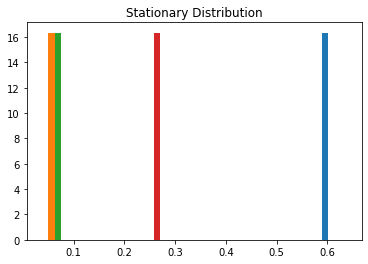

In [ ]:
# multiply the initial distribution with the matrix P for many times to get 
# stationary distribution
all_initdist =[]
for i in range(10000): 
    initdist = np.matmul(initdist, P)
    all_initdist.append(initdist)
print(f' The stationary distribution is', initdist)
plt.hist(initdist, density=True)
plt.title ('Stationary Distribution')

In [ ]:
eigenvectors = np.linalg.eig(P.transpose()) # find eigenvectors of P
eigenvectors

(array([-0.21737269,  0.35822669,  1.        ,  0.96637303]),
 array([[-0.25340962, -0.24509053, -0.9300295 , -0.78505495],
        [ 0.60437139,  0.30238279, -0.04630344,  0.01371246],
        [-0.67992697,  0.62206659, -0.12586581,  0.17828746],
        [ 0.3289652 , -0.67935884, -0.34213873,  0.59305503]]))

In [ ]:
# find the stationary distribution from eigenvectors
print((eigenvectors[1][:,2])/sum(eigenvectors[1][:,2]))

[0.64391426 0.0320586  0.08714432 0.23688282]
